## Parametric Bootstrap simulation of sampling distributions for MLE estimators

In [25]:
x <- c(10, 68, 112)

x.n = sum(x)
x.theta.mle = (2*x[3] + x[2])/(2*sum(x))

print(x.theta.mle)

[1] 0.7684211


In [26]:
# Function computing cell probabilities given hardy-Weinberg theta parameter
fcn.probs.hardweinberg <- function(theta0){
    probs = c((1-theta0)**2, 2*theta0*(1-theta0), theta0**2)
    return(probs)
}


# Function computing cell counts given w.sample, a sample of single-outcome multinomial
# random variables (comparable to Bernoulli outcomes underlying a binomial)
fcn.w.sample.counts <- function(w.sample, w.samplespace){
    result = 0 * w.samplespace
    for (j.outcome in c(1:length(w.samplespace))){
        result[j.outcome] <- sum(w.sample == w.samplespace[j.outcome])
    }
    return(result)
}

args(sample)

function (x, size, replace = FALSE, prob = NULL) 
NULL

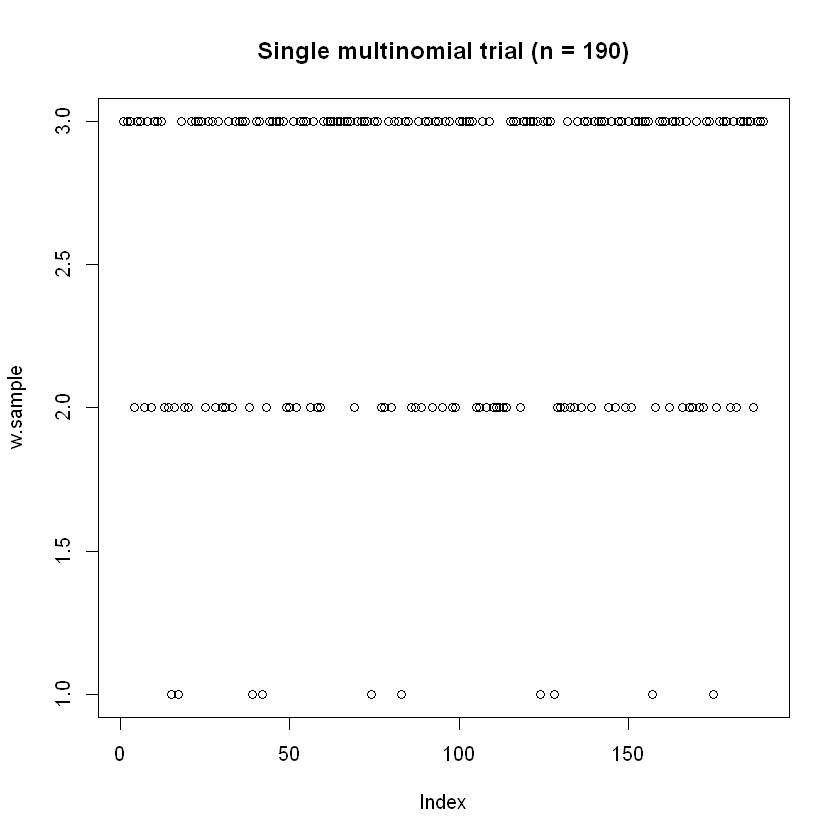

In [27]:
w.samplespace = c(1, 2, 3)

w.sample = sample(x = w.samplespace, size = x.n, replace = TRUE,
                 prob = fcn.probs.hardweinberg(x.theta.mle))

w.sample.counts <- fcn.w.sample.counts(w.sample, w.samplespace)

par(mfcol = c(1, 1))
plot(w.sample, main = paste("Single multinomial trial (n = ", as.character(x.n), ")", sep = ""))

In [28]:
print(table(w.sample))

w.sample
  1   2   3 
 10  63 117 


In [29]:
print(w.sample.counts)

[1]  10  63 117


In [30]:
# Conduct simulation
n.simulations = 20000

data.simulations <- matrix(NA, nrow = n.simulations, ncol = 1)

for (j.simulation in c(1:n.simulations)){
    j.w.sample = sample(x = w.samplespace, size = x.n, replace = TRUE,
                       prob = fcn.probs.hardweinberg(x.theta.mle))
    j.w.sample.counts <- fcn.w.sample.counts(j.w.sample, w.samplespace)
    x.j = j.w.sample.counts
    
    x.j.theta.mle = (2*x.j[3] + x.j[2])/(2*sum(x.j))
    data.simulations[j.simulation, 1] = x.j.theta.mle
}

print(simulation.var <- apply(data.simulations, 2, var))

[1] 0.0004646706


In [31]:
print(var.x.theta.mle <- x.theta.mle*(1 - x.theta.mle)/(2*x.n))

[1] 0.0004682898


In [32]:
# Validate simulation
print(simulations.mean <- apply(data.simulations, 2, mean))

[1] 0.7682662


In [33]:
print(simulations.stdev <- sqrt(apply(data.simulations, 2, var)))

[1] 0.02155622


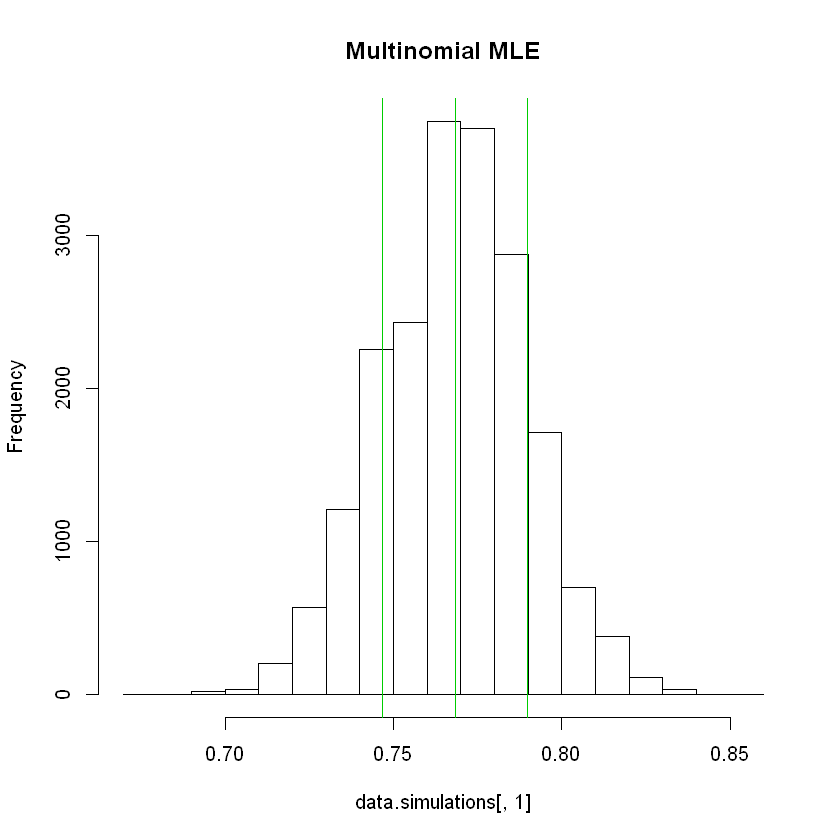

In [34]:
hist(data.simulations[,1], main = "Multinomial MLE")
abline(v = simulations.mean[1] + c(-1, 0, 1)*simulations.stdev[1], col = c(3, 3, 3))

In [35]:
# Histogram of estimation errors for each estimator
data.simulations.error = data.simulations - x.theta.mle

print(simulations.error.means <- apply(data.simulations.error, 2, mean))

[1] -0.0001548684


In [36]:
print(simulations.error.stdevs <- sqrt(apply(data.simulations.error, 2, var)))

[1] 0.02155622


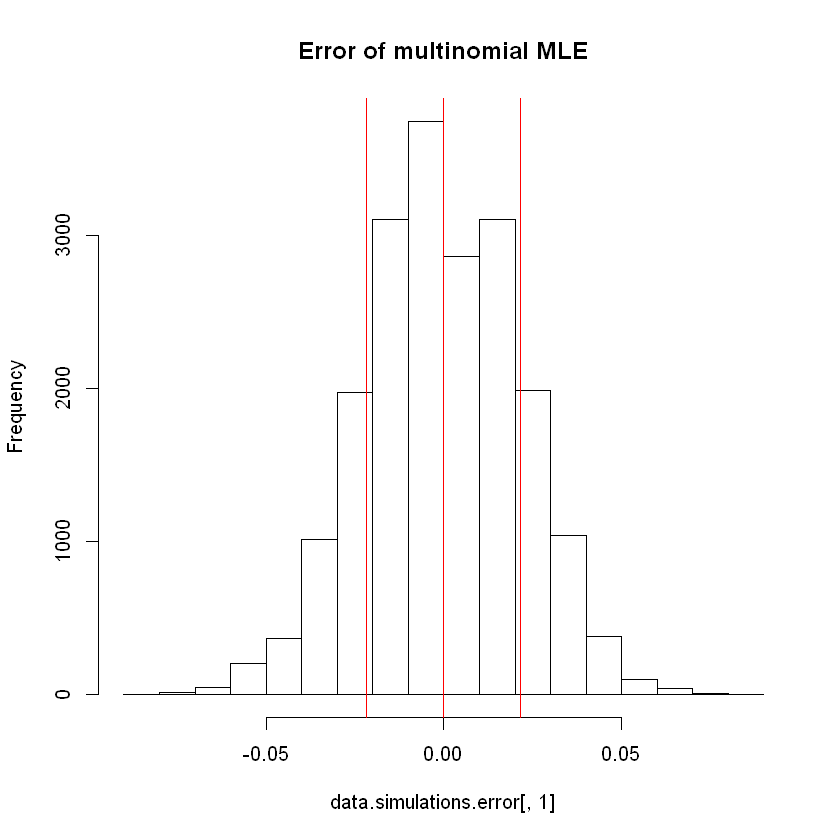

In [37]:
hist(data.simulations.error[,1], main = "Error of multinomial MLE")
abline(v = simulations.error.means[1] + c(-1, 0, 1)*simulations.error.stdevs[1], col = c(2, 2, 2))

In [38]:
# Bootstrap confidence interval
head(data.simulations.error)

-0.02368421
-0.02631579
-0.02894737
-0.01052632
-0.02631579
-0.01578947


In [39]:
quantile(data.simulations.error[,1], probs = c(0.005, 0.995))

0.5%       99.5% 
-0.05789474  0.05526316

In [40]:
x.theta.mle

[1] 0.7684211

In [41]:
# Approximate 99% confidence interval based on MLE
approx.CI.limits.99percent.mle = x.theta.mle + c(- quantile(data.simulations.error[,1], probs = 0.995),
                                                - quantile(data.simulations.error[,1], probs = 0.005))
approx.CI.limits.99percent.mle

99.5%      0.5% 
0.7131579 0.8263158